In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# importing dataset
df=pd.read_csv("youth_smoking_drug_data_10000_rows_expanded.csv")
df.head()

,Year,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,2024,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,2024,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,2023,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,2024,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,2023,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [3]:
# EDA
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  10000 non-null  int64  
 1   Age_Group             10000 non-null  object 
 2   Gender                10000 non-null  object 
 3   Smoking_Prevalence    10000 non-null  float64
 4   Drug_Experimentation  10000 non-null  float64
 5   Socioeconomic_Status  10000 non-null  object 
 6   Peer_Influence        10000 non-null  int64  
 7   School_Programs       10000 non-null  object 
 8   Family_Background     10000 non-null  int64  
 9   Mental_Health         10000 non-null  int64  
 10  Access_to_Counseling  10000 non-null  object 
 11  Parental_Supervision  10000 non-null  int64  
 12  Substance_Education   10000 non-null  object 
 13  Community_Support     10000 non-null  int64  
 14  Media_Influence       10000 non-null  int64  
dtypes: float64(2), int64

,Year,Smoking_Prevalence,Drug_Experimentation,Peer_Influence,Family_Background,Mental_Health,Parental_Supervision,Community_Support,Media_Influence
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022.000500,27.439257,40.150182,5.440100,5.513300,5.469800,5.528000,5.544600,5.506200
std,1.425027,12.975528,17.515917,2.863151,2.865038,2.879326,2.891514,2.870302,2.872836
min,2020.000000,5.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2021.000000,16.160000,24.920000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2022.000000,27.355000,40.100000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000
75%,2023.000000,38.672500,55.462500,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,2024.000000,50.000000,69.990000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [4]:
# removing year column
df=df.drop(['Year'],axis=1)
df.head()

,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,15-19,Both,18.85,32.40,High,5,Yes,1,5,No,4,No,3,1
1,10-14,Female,34.88,41.57,High,6,Yes,10,5,No,9,Yes,9,3
2,10-14,Both,42.00,56.80,High,6,Yes,2,7,Yes,2,No,5,1
3,40-49,Both,33.75,42.90,Middle,10,No,9,7,Yes,2,No,10,9
4,15-19,Male,47.90,39.62,High,1,No,2,4,Yes,4,No,10,3


In [5]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labels={}
for col in ['Age_Group','Gender','Socioeconomic_Status','School_Programs','Access_to_Counseling','Substance_Education']:
    encode=LabelEncoder()
    df[col]=encode.fit_transform(df[col])
    labels[col]=encode
# New dataset
df.head()
    

,Age_Group,Gender,Smoking_Prevalence,Drug_Experimentation,Socioeconomic_Status,Peer_Influence,School_Programs,Family_Background,Mental_Health,Access_to_Counseling,Parental_Supervision,Substance_Education,Community_Support,Media_Influence
0,1,0,18.85,32.40,0,5,1,1,5,0,4,0,3,1
1,0,1,34.88,41.57,0,6,1,10,5,0,9,1,9,3
2,0,0,42.00,56.80,0,6,1,2,7,1,2,0,5,1
3,5,0,33.75,42.90,2,10,0,9,7,1,2,0,10,9
4,1,2,47.90,39.62,0,1,0,2,4,1,4,0,10,3


C:\Users\sriku\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

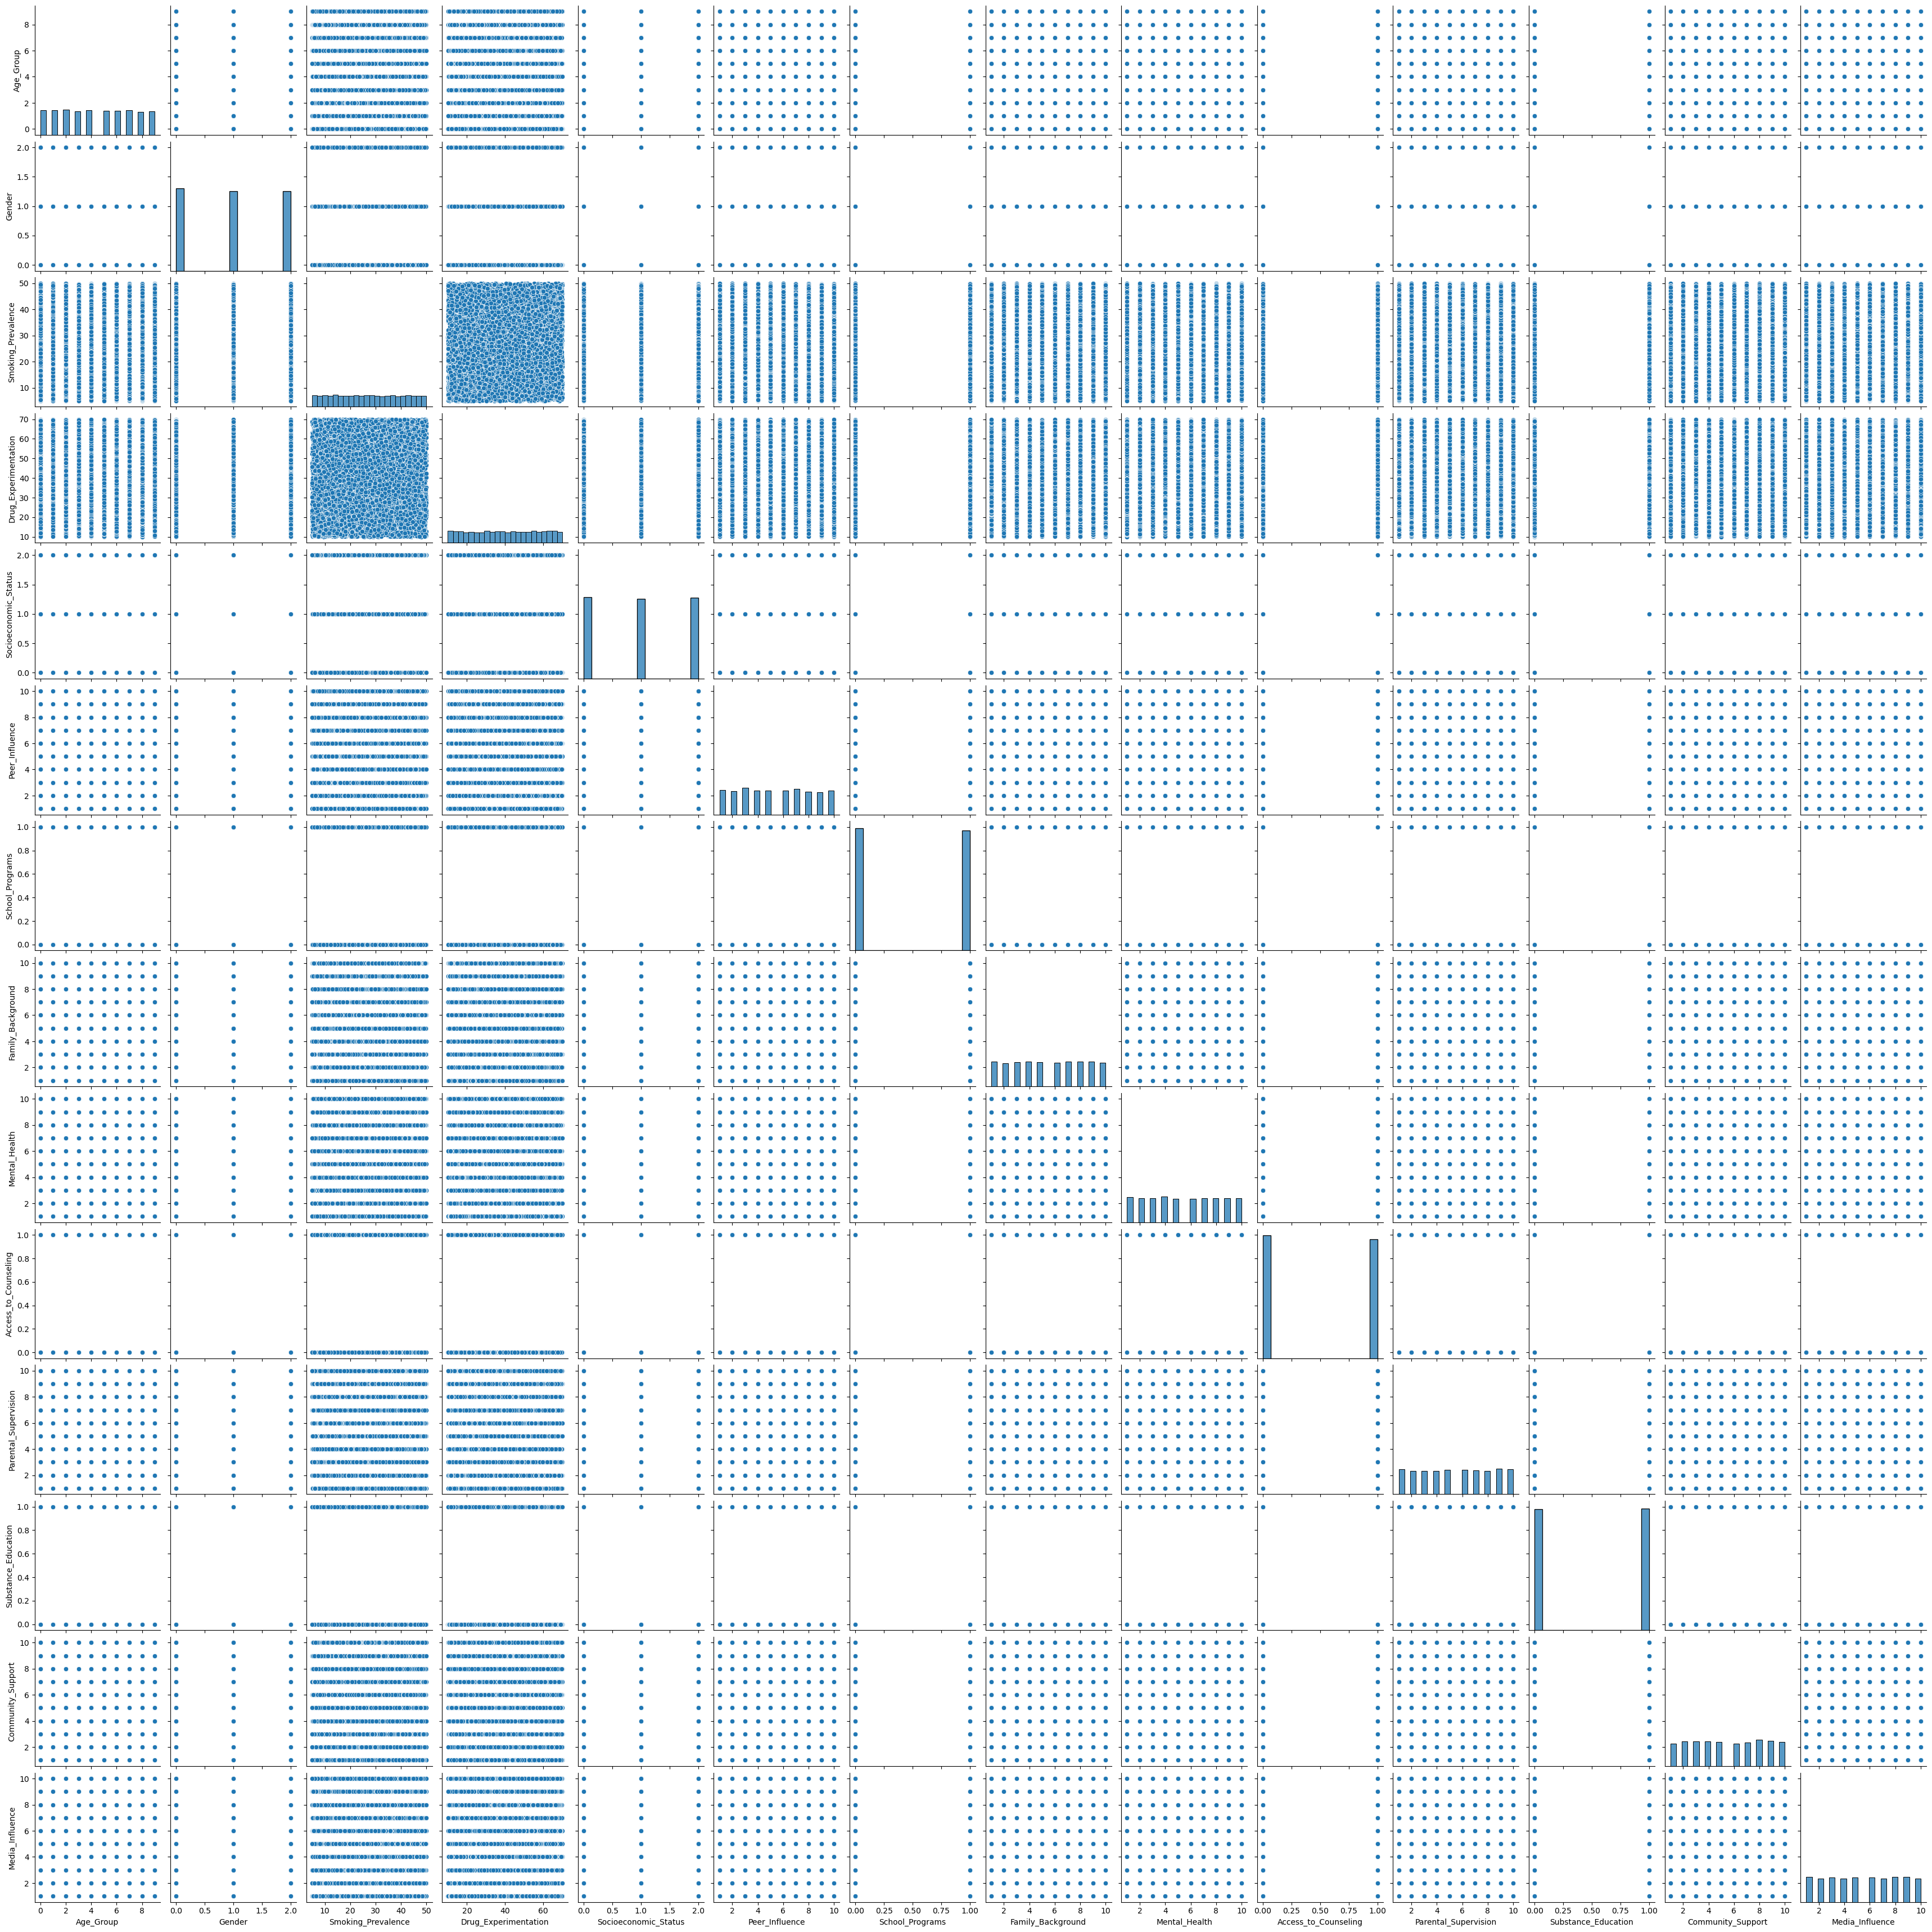

In [22]:
# pairplot
import seaborn as sns
plt.figure(figsize=(10,8))
sns.pairplot(df)
plt.show()

In [6]:
# Converting df to nd array
data=df.to_numpy()
data

array([[ 1.  ,  0.  , 18.85, ...,  0.  ,  3.  ,  1.  ],
       [ 0.  ,  1.  , 34.88, ...,  1.  ,  9.  ,  3.  ],
       [ 0.  ,  0.  , 42.  , ...,  0.  ,  5.  ,  1.  ],
       ...,
       [ 3.  ,  0.  , 47.62, ...,  0.  ,  5.  , 10.  ],
       [ 5.  ,  2.  ,  9.37, ...,  1.  , 10.  ,  4.  ],
       [ 0.  ,  2.  , 43.77, ...,  0.  ,  6.  ,  3.  ]])

In [7]:
# Standardizing dataset
# Finding mean
xbar=data.mean(axis=0)
xbar

array([ 4.4576  ,  0.9879  , 27.439257, 40.150182,  0.998   ,  5.4401  ,
        0.4959  ,  5.5133  ,  5.4698  ,  0.4915  ,  5.528   ,  0.5011  ,
        5.5446  ,  5.5062  ])

In [8]:
# Finding STD
stdev=np.std(data,axis=0,ddof=1) #for sample ddof=1,population=0
stdev

array([ 2.86311404,  0.81903643, 12.97552755, 17.51591712,  0.81906232,
        2.86315067,  0.50000819,  2.86503821,  2.87932579,  0.49995274,
        2.89151381,  0.50002379,  2.8703022 ,  2.87283603])

In [9]:
# standardized data
s_data=(data-xbar)/stdev
s_data

array([[-1.20763615, -1.20617346, -0.66195821, ..., -1.00215231,
        -0.88652686, -1.56855454],
       [-1.5569062 ,  0.01477346,  0.57344435, ...,  0.99775252,
         1.20384537, -0.87237836],
       [-1.5569062 , -1.20617346,  1.12216963, ..., -1.00215231,
        -0.18973612, -1.56855454],
       ...,
       [-0.50909603, -1.20617346,  1.55529268, ..., -1.00215231,
        -0.18973612,  1.56423825],
       [ 0.18944408,  1.23572037, -1.39256434, ...,  0.99775252,
         1.55224074, -0.52429028],
       [-1.5569062 ,  1.23572037,  1.25858027, ..., -1.00215231,
         0.15865925, -0.87237836]])

In [10]:
# Compute covariance 
cov_mat=np.cov(s_data,rowvar=False)#True when each row represent variable(here column represent variable)
cov_mat

array([[ 1.00000000e+00, -1.05044431e-03, -1.25151629e-02,
        -9.99068207e-03, -8.69349268e-03,  7.52866232e-03,
        -3.57950709e-03, -7.08184530e-03, -1.61111949e-03,
         2.99704060e-03,  1.58720336e-02,  3.21110575e-03,
        -9.60292378e-03, -3.03207711e-03],
       [-1.05044431e-03,  1.00000000e+00, -6.79338388e-03,
        -1.55512616e-02,  1.93444955e-02, -2.93194249e-03,
        -5.37166326e-03, -4.51302369e-03,  4.31909274e-03,
        -6.96771206e-03,  2.40234628e-03,  8.45747866e-03,
         2.03729699e-02, -1.73309804e-02],
       [-1.25151629e-02, -6.79338388e-03,  1.00000000e+00,
         7.21574631e-03,  1.15756048e-02,  1.41414519e-02,
        -1.00543119e-02,  3.34193754e-03,  4.15812072e-03,
        -4.27438641e-03,  4.01955591e-03, -1.11765210e-03,
         5.86825637e-03,  1.00485005e-02],
       [-9.99068207e-03, -1.55512616e-02,  7.21574631e-03,
         1.00000000e+00, -4.00626438e-03,  9.87121667e-04,
        -1.61743285e-02, -8.45994353e-03,  2.

In [30]:
# Finding eigenvalues and eigenvectors
eigen_values,eigen_vectors=np.linalg.eigh(cov_mat)

In [31]:
# eigenvalues
eigen_values

array([0.93426673, 0.95060152, 0.96858222, 0.97272938, 0.98358138,
       0.9911648 , 1.00065497, 1.00251656, 1.01229762, 1.01506718,
       1.02891448, 1.03647774, 1.04985207, 1.05329336])

In [32]:
# eigenvectors
eigen_vectors

array([[-0.03507041,  0.29288121, -0.04842741,  0.22329899,  0.4922072 ,
         0.31640277,  0.51528658, -0.15185771,  0.08651904, -0.09718641,
        -0.16565356, -0.09948637,  0.3246792 ,  0.26483463],
       [-0.46313875,  0.03743633, -0.00402146, -0.28358913, -0.10050806,
         0.30879132,  0.10299197,  0.13664757, -0.01457757,  0.39241247,
         0.18142828, -0.61177792, -0.05913003, -0.06358726],
       [-0.1170234 ,  0.24525509, -0.5116539 ,  0.05535274,  0.08407837,
         0.09952631, -0.18860981, -0.42705876, -0.05359801,  0.45057603,
        -0.26746938,  0.24322793, -0.24372534, -0.17430168],
       [-0.21052916,  0.4430229 ,  0.32648612, -0.23131425,  0.03809765,
        -0.13390169,  0.19018371,  0.37322109, -0.05699146,  0.06277671,
        -0.30518991,  0.3234972 ,  0.06829039, -0.44138415],
       [ 0.47715849,  0.23097577,  0.21840981,  0.08917381, -0.27367727,
         0.09620025,  0.37724383, -0.04964766,  0.08398011,  0.09684586,
        -0.09925748, -0.15

In [33]:
# Sorting eigenvalues
sorted_index=np.argsort(eigen_values)[::-1]
sorted_index

array([13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1,  0],
      dtype=int64)

In [34]:
sorted_eigenvectors=eigen_vectors[:,sorted_index]
sorted_eigenvectors

array([[ 0.26483463,  0.3246792 , -0.09948637, -0.16565356, -0.09718641,
         0.08651904, -0.15185771,  0.51528658,  0.31640277,  0.4922072 ,
         0.22329899, -0.04842741,  0.29288121, -0.03507041],
       [-0.06358726, -0.05913003, -0.61177792,  0.18142828,  0.39241247,
        -0.01457757,  0.13664757,  0.10299197,  0.30879132, -0.10050806,
        -0.28358913, -0.00402146,  0.03743633, -0.46313875],
       [-0.17430168, -0.24372534,  0.24322793, -0.26746938,  0.45057603,
        -0.05359801, -0.42705876, -0.18860981,  0.09952631,  0.08407837,
         0.05535274, -0.5116539 ,  0.24525509, -0.1170234 ],
       [-0.44138415,  0.06829039,  0.3234972 , -0.30518991,  0.06277671,
        -0.05699146,  0.37322109,  0.19018371, -0.13390169,  0.03809765,
        -0.23131425,  0.32648612,  0.4430229 , -0.21052916],
       [ 0.04676912, -0.61709183, -0.15846174, -0.09925748,  0.09684586,
         0.08398011, -0.04964766,  0.37724383,  0.09620025, -0.27367727,
         0.08917381,  0.21

In [35]:
100*eigen_values[0]/sum(eigen_values)  #% of variance explained by first eigenvalue

TypeError: 'int' object is not callable

In [26]:
sumn = 0
total_sum = sum(eigen_values)  # Avoid using 'sum' as a variable name

for i in range(20):
    if sumn >= 90:
        print(i - 1)
        break
    else:
        sumn += 100 * eigen_values[i] / total_sum  # Using total_sum instead of sum(eigen_values)


TypeError: 'int' object is not callable

In [17]:
# choosing number of dimensions
n_component=2
eigenvector_subset=sorted_eigenvectors[:,0:n_component]
eigenvector_subset

array([[ 0.26483463,  0.3246792 ],
       [-0.06358726, -0.05913003],
       [-0.17430168, -0.24372534],
       [-0.44138415,  0.06829039],
       [ 0.04676912, -0.61709183],
       [ 0.33065881, -0.24497886],
       [ 0.22371127, -0.14735222],
       [ 0.21239154, -0.11694699],
       [-0.43925295, -0.01186103],
       [ 0.17050635, -0.16212023],
       [ 0.06464836,  0.51091968],
       [ 0.10158087,  0.16608671],
       [-0.47905068, -0.01375083],
       [-0.16713925, -0.18862327]])

In [18]:
# Transform the data
transformed_data=np.matmul(s_data,eigenvector_subset)
transformed_data

array([[ 0.30564154,  0.66851203],
       [-0.3310351 ,  0.82021845],
       [-0.86564745, -0.60646124],
       ...,
       [-0.66610294, -0.66771194],
       [ 1.10451367, -0.15761655],
       [-0.17130751, -1.09010623]])

In [19]:
# Reconstructiong data
re_data=np.matmul(transformed_data,eigenvector_subset.transpose())
re_data

array([[ 0.29799641, -0.05896405, -0.21620715, ...,  0.1420783 ,
        -0.15561038, -0.17718162],
       [ 0.17863831, -0.02744993, -0.14220805, ...,  0.10260055,
         0.14730391, -0.09938333],
       [-0.42615877,  0.09090422,  0.29869377, ..., -0.18865837,
         0.42302835,  0.25907637],
       ...,
       [-0.3931993 ,  0.08183749,  0.27884118, ..., -0.1785614 ,
         0.32827866,  0.23727796],
       [ 0.24133865, -0.06091312, -0.15410343, ...,  0.08601944,
        -0.52695067, -0.15487744],
       [-0.39930298,  0.07535099,  0.2955457 , ..., -0.19845372,
         0.09705484,  0.23425161]])